This notebook builds on the `2020-07-06 Single neuron sim` notebook.

There, we used an ad-hoc solution to stimulate the simulated neuron
(namely, directly give I as input, where I is a spike train convolved with a manually
defined EPSC).

Here, we use proper synaptic conductances.


In [37]:
%run init.ipynb
# from init import *

Reloaded voltage_to_wiring_sim.auto_reload_package
Reloaded voltage_to_wiring_sim.units
Reloaded voltage_to_wiring_sim.neuron_params
Reloaded voltage_to_wiring_sim.time_grid
Reloaded voltage_to_wiring_sim.neuron_sim
Reloaded voltage_to_wiring_sim.plot_style
Reloaded voltage_to_wiring_sim.presynaptic_spike_train
Reloaded voltage_to_wiring_sim
Importing np, mpl, plt … ✔
Importing unyt … ✔
Importing code package (voltage_to_wiring_sim), as `v` … ✔
Imported * from v.units
The voltage_to_wiring_sim.auto_reload_package extension is already loaded. To reload it, use:
  %reload_ext voltage_to_wiring_sim.auto_reload_package


Reloaded voltage_to_wiring_sim.auto_reload_package
Reloaded voltage_to_wiring_sim.units
Reloaded voltage_to_wiring_sim.neuron_params
Reloaded voltage_to_wiring_sim.time_grid
Reloaded voltage_to_wiring_sim.neuron_sim
Reloaded voltage_to_wiring_sim.plot_style
Reloaded voltage_to_wiring_sim.presynaptic_spike_train
Reloaded voltage_to_wiring_sim
Running test simulation with units … ✔ (1.8 s)


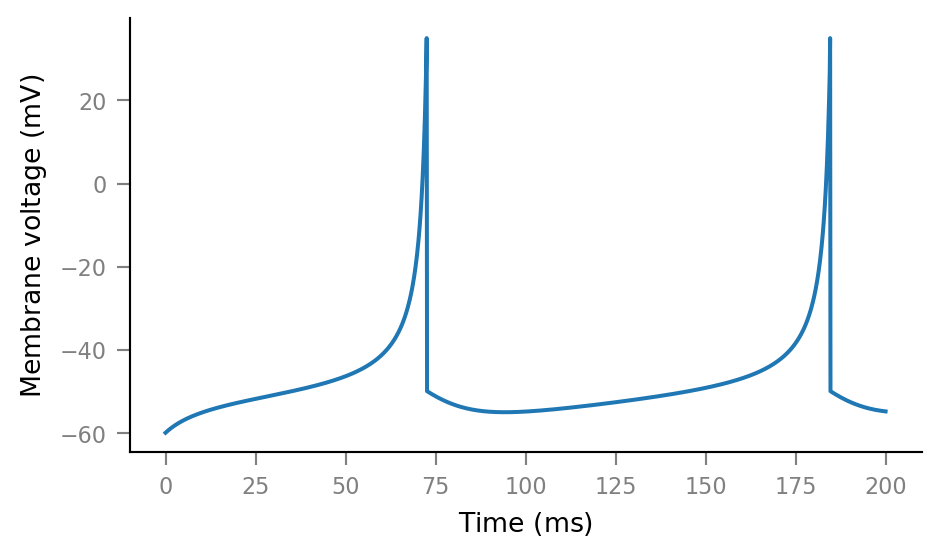

In [39]:
r = v.neuron_sim.test()

In [32]:
r

NameError: name 'r' is not defined

In [27]:
%debug

> d:\conda\lib\site-packages\unyt\testing.py(56)assert_allclose_units()
     54     """
     55     if not allclose_units(actual, desired, rtol, atol, **kwargs):
---> 56         raise AssertionError
     57 
     58 

ipdb> u
> d:\drive\phd\voltage-to-wiring-sim\code\voltage_to_wiring_sim\neuron_sim.py(92)simulate_izh_neuron()
     90         # Test whether the fast, unitless simulation gives the same results as the
     91         # simulation with units.
---> 92         assert_allclose_units(V_m_test, result.V_m[:num_test_iterations])
     93         assert_allclose_units(u_test, result.u[:num_test_iterations])
     94         assert_allclose_units(I_syn_test, result.I_syn[:num_test_iterations])

ipdb> V_m_test[:10]
unyt_array([-60 mV, -59.94 mV, -59.88 mV, -59.82 mV, -59.76 mV, -59.71 mV,
            -59.65 mV, -59.6 mV, -59.54 mV, -59.49 mV], 'mV')
ipdb> result.V_m[:10]
unyt_array([-60 mV, -59.94 mV, -59.88 mV, -59.82 mV, -59.76 mV, -59.71 mV,
            -59.65 mV, -59.6 mV, -59.5

In [ ]:
percentile

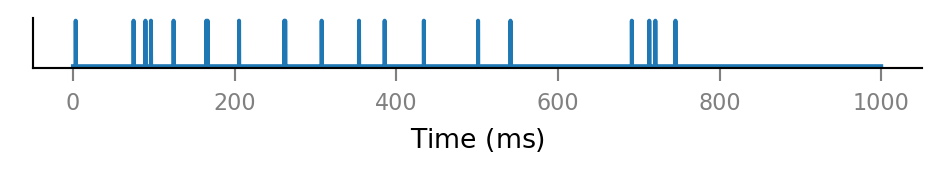

In [3]:
v.presynaptic_spike_train.show()

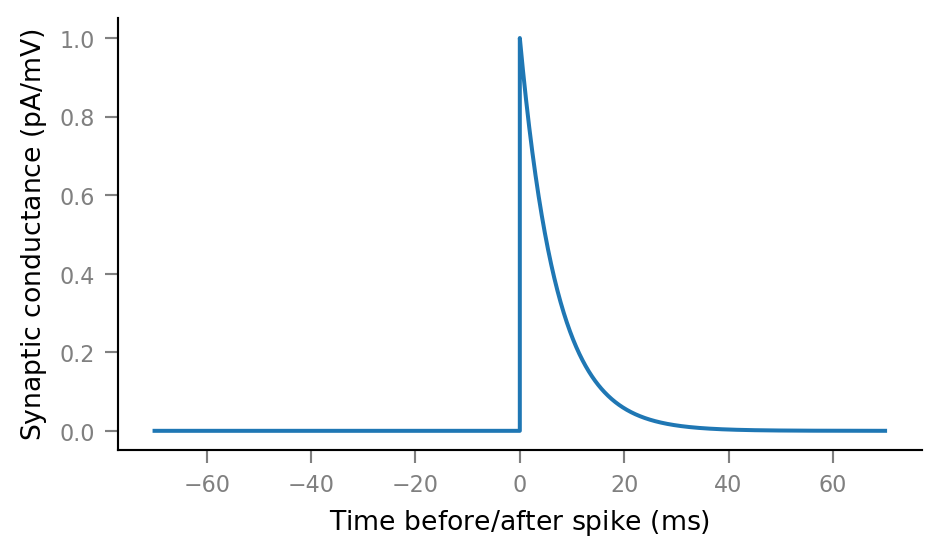

In [39]:
g_syn_tau = 7 * ms
g_syn_max = 1 * nS

time_grid = v.time_grid.time_grid
T_support = 10 * g_syn_tau
N_support = round(T_support / time_grid.dt)
t_support = np.linspace(0, T_support, N_support)

g_syn = unyt_array(
    np.concatenate([np.zeros(N_support), np.exp(-t_support / g_syn_tau) * g_syn_max]),
    nS,
    name="Synaptic conductance",
)

t_plot = unyt_array(
    np.concatenate([-t_support[::-1], t_support]), ms, name="Time before/after spike"
)
plt.plot(t_plot, g_syn)

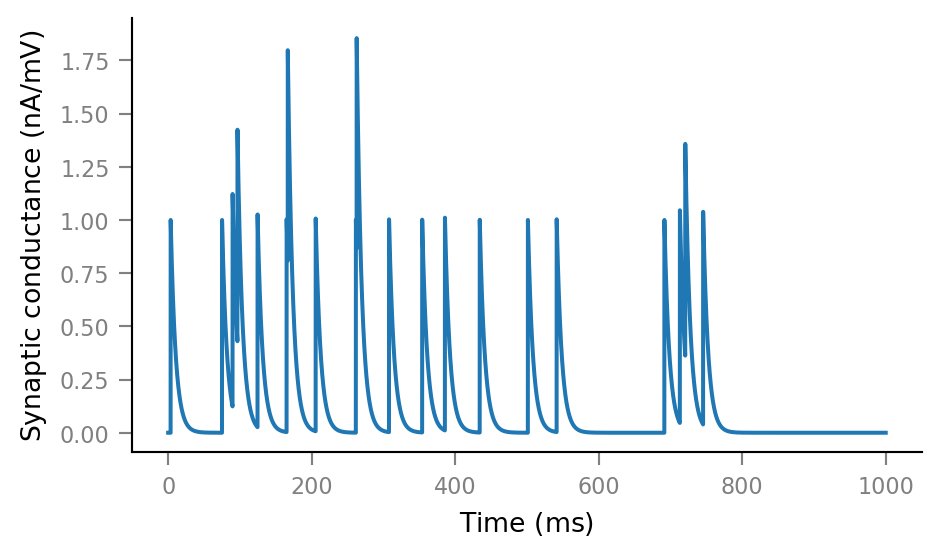

In [40]:
g_syn_total = unyt_array(
    np.convolve(v.presynaptic_spike_train.all_spikes, g_syn, mode="same"),
    mS,
    name="Synaptic conductance",
)
plt.plot(time_grid.t, g_syn_total)

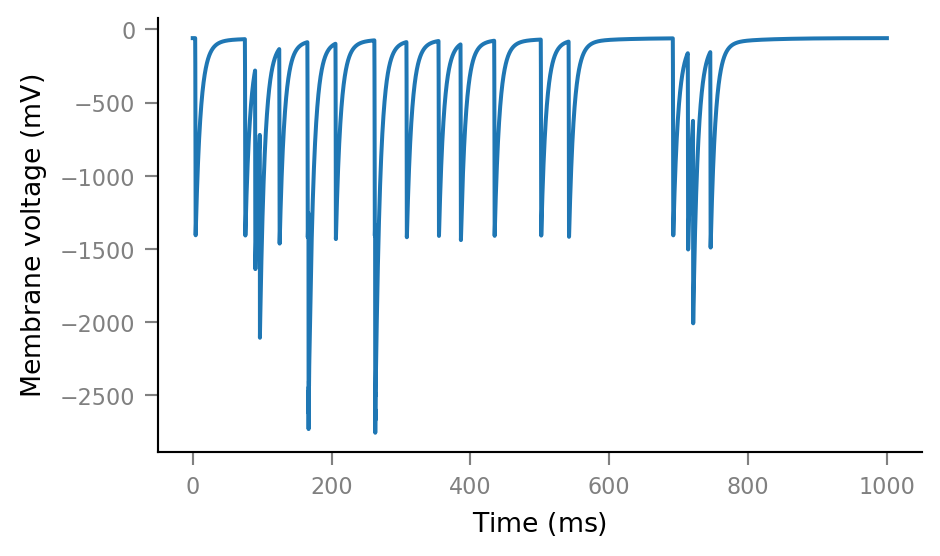

In [43]:
zero_electrode_current = np.zeros(time_grid.N)
sim = v.neuron_sim.izh_neuron(
    g_syn_total, zero_electrode_current, time_grid, **v.cortical_RS_neuron.izh_params
)
plt.plot(time_grid.t, sim.V_m)